### Diabetes Classification using KNN

#### 1. Reading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading the traing data
df = pd.read_csv('Training_Data/Diabetes_XTrain.csv')
Xtrain = df.values
df = pd.read_csv('Training_Data/Diabetes_YTrain.csv')
Ytrain = df.values
Ytrain = Ytrain.reshape((-1,))
print(Xtrain.shape,Ytrain.shape)

(576, 8) (576,)


In [4]:
# reading the test data
df = pd.read_csv('Diabetes_Xtest.csv')
Xtest = df.values
print(Xtest.shape)

(192, 8)


#### 2. Plotting the Bar graph

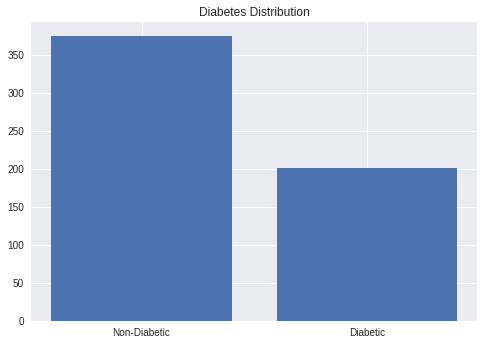

In [5]:
plt.style.use('seaborn')
x,y = np.unique(Ytrain,return_counts=True)
plt.bar(x,y,tick_label=['Non-Diabetic','Diabetic'])
plt.title("Diabetes Distribution")
plt.show()

#### 3. Implementing KNN

In [6]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,query,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d = dist(query,X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    idx = new_vals[1].argmax()
    pred = new_vals[0][idx]
    return pred

#### 4. Classification

In [7]:
vals = []
m = Xtest.shape[0]
for i in range(m):
    pred = KNN(Xtrain,Ytrain,Xtest[i],13)
    vals.append(pred)
new_df = pd.DataFrame(vals,dtype='int32',columns=["Outcome"]) 
new_df.to_csv('Prediction.csv',index=False)